In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

In [3]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 09:10:14.614940


In [0]:
# Calling our modules
import Utils
import QuizDNN
import Model_train
import Model_test

In [0]:
#!pip install -U git+https://github.com/albu/albumentations#

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.RandomHorizontalFlip(),
     #transforms.RandomCrop(32, padding=4),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


truck truck plane  bird


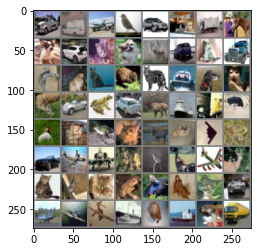

In [6]:


# functions to show an image


# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
#imshow(torchvision.utils.make_grid(images))
Utils.imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = QuizDNN.QuizDNN().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [0]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [0]:
def model_call(model,criterion, device, trainloader, optimizer,scheduler,testloader, epoch):

  Model_train.train(model, criterion,device, trainloader, optimizer, scheduler,epoch, train_losses, train_acc)
  scheduler.step()
  Model_test.test(model, device, testloader, test_losses, test_acc)

In [10]:
model =  QuizDNN.QuizDNN().to(device)
#model =  Model.Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)
EPOCHS = 20


for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1)
  model_call(model,criterion,device, trainloader, optimizer,scheduler,testloader, epoch)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.873079776763916 Batch_id=781 Accuracy=51.58: 100%|██████████| 782/782 [00:21<00:00, 36.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -3.6175, Accuracy: 6041/10000 (60.41%)

EPOCH: 2


Loss=0.7912279367446899 Batch_id=781 Accuracy=66.03: 100%|██████████| 782/782 [00:21<00:00, 36.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -4.7935, Accuracy: 7060/10000 (70.60%)

EPOCH: 3


Loss=0.4950070083141327 Batch_id=781 Accuracy=72.15: 100%|██████████| 782/782 [00:21<00:00, 36.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.8252, Accuracy: 7472/10000 (74.72%)

EPOCH: 4


Loss=1.1246531009674072 Batch_id=781 Accuracy=76.65: 100%|██████████| 782/782 [00:21<00:00, 36.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.5338, Accuracy: 7382/10000 (73.82%)

EPOCH: 5


Loss=0.7436199188232422 Batch_id=781 Accuracy=79.39: 100%|██████████| 782/782 [00:21<00:00, 36.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.9812, Accuracy: 7590/10000 (75.90%)

EPOCH: 6


Loss=0.604492723941803 Batch_id=781 Accuracy=80.98: 100%|██████████| 782/782 [00:21<00:00, 36.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.4133, Accuracy: 7652/10000 (76.52%)

EPOCH: 7


Loss=0.3405154347419739 Batch_id=781 Accuracy=82.06: 100%|██████████| 782/782 [00:21<00:00, 36.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.6273, Accuracy: 7975/10000 (79.75%)

EPOCH: 8


Loss=0.5142045617103577 Batch_id=781 Accuracy=82.92: 100%|██████████| 782/782 [00:21<00:00, 36.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.5550, Accuracy: 7801/10000 (78.01%)

EPOCH: 9


Loss=0.7530872821807861 Batch_id=781 Accuracy=83.49: 100%|██████████| 782/782 [00:21<00:00, 36.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.7569, Accuracy: 8146/10000 (81.46%)

EPOCH: 10


Loss=0.6045575141906738 Batch_id=781 Accuracy=84.06: 100%|██████████| 782/782 [00:21<00:00, 36.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.0872, Accuracy: 8088/10000 (80.88%)

EPOCH: 11


Loss=0.24464674293994904 Batch_id=781 Accuracy=85.07: 100%|██████████| 782/782 [00:22<00:00, 35.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.2101, Accuracy: 7844/10000 (78.44%)

EPOCH: 12


Loss=0.15173938870429993 Batch_id=781 Accuracy=85.78: 100%|██████████| 782/782 [00:22<00:00, 34.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.3844, Accuracy: 7876/10000 (78.76%)

EPOCH: 13


Loss=0.4103378653526306 Batch_id=781 Accuracy=86.45: 100%|██████████| 782/782 [00:22<00:00, 34.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -8.0009, Accuracy: 8123/10000 (81.23%)

EPOCH: 14


Loss=0.6454400420188904 Batch_id=781 Accuracy=87.58: 100%|██████████| 782/782 [00:22<00:00, 34.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.0275, Accuracy: 8137/10000 (81.37%)

EPOCH: 15


Loss=0.6317829489707947 Batch_id=781 Accuracy=89.07: 100%|██████████| 782/782 [00:22<00:00, 34.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.9789, Accuracy: 8315/10000 (83.15%)

EPOCH: 16


Loss=0.5923548340797424 Batch_id=781 Accuracy=90.58: 100%|██████████| 782/782 [00:22<00:00, 34.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -8.6765, Accuracy: 8570/10000 (85.70%)

EPOCH: 17


Loss=0.07650083303451538 Batch_id=781 Accuracy=92.88: 100%|██████████| 782/782 [00:22<00:00, 34.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -9.3375, Accuracy: 8604/10000 (86.04%)

EPOCH: 18


Loss=0.14807568490505219 Batch_id=781 Accuracy=95.09: 100%|██████████| 782/782 [00:22<00:00, 34.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -9.8488, Accuracy: 8702/10000 (87.02%)

EPOCH: 19


Loss=0.019029676914215088 Batch_id=781 Accuracy=96.52: 100%|██████████| 782/782 [00:22<00:00, 34.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -10.2161, Accuracy: 8774/10000 (87.74%)

EPOCH: 20


Loss=0.0850813090801239 Batch_id=781 Accuracy=97.06: 100%|██████████| 782/782 [00:22<00:00, 35.11it/s]



Test set: Average loss: -10.2985, Accuracy: 8782/10000 (87.82%)



GroundTruth:   frog horse   cat   dog


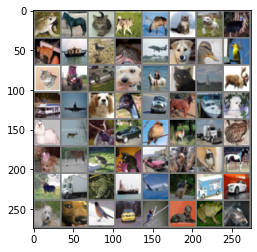

In [11]:
xdataiter = iter(testloader)
images, labels = dataiter.next()

Utils.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
out_imag =[]
for i, data in enumerate(testloader, 0):
        # get the inputs
        out_imag = data[0].to(device)
outputs = model(out_imag)


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse   dog  ship plane


In [13]:
import Utils
# Printing total accuracy
Utils.total_accuracy(testloader,model,device)

Accuracy of the network on the 10000 test images: 87 %


In [14]:
# Printing classwise accuracy
Utils.class_accuracy(testloader, model,device)    

Accuracy of plane : 94 %
Accuracy of   car : 90 %
Accuracy of  bird : 82 %
Accuracy of   cat : 71 %
Accuracy of  deer : 81 %
Accuracy of   dog : 86 %
Accuracy of  frog : 91 %
Accuracy of horse : 90 %
Accuracy of  ship : 93 %
Accuracy of truck : 91 %
